In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("Informacion-demografica.csv", encoding="cp1252")


In [135]:
df_mortalidad= df[(df['Year'] == 2020) & (df["Series"]=='Infant mortality for both sexes (per 1,000 live births)')]
df_mortalidad = df_mortalidad.rename(columns={'Value': 'Mortality Rate'})
df_mortalidad

,Region/Country/Area,Year,Series,Mortality Rate,Footnotes,Source
16,"Total, all countries or areas",2020,"Infant mortality for both sexes (per 1,000 liv...",28.3,NaN,"United Nations Statistics Division, New York, ..."
43,Africa,2020,"Infant mortality for both sexes (per 1,000 liv...",46.4,NaN,"United Nations Statistics Division, New York, ..."
70,Northern Africa,2020,"Infant mortality for both sexes (per 1,000 liv...",22.6,NaN,"United Nations Statistics Division, New York, ..."
97,Sub-Saharan Africa,2020,"Infant mortality for both sexes (per 1,000 liv...",50,NaN,"United Nations Statistics Division, New York, ..."
124,Eastern Africa,2020,"Infant mortality for both sexes (per 1,000 liv...",38.3,NaN,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...
6637,Zambia,2020,"Infant mortality for both sexes (per 1,000 liv...",42.6,NaN,"United Nations Statistics Division, New York, ..."
6664,Zimbabwe,2020,"Infant mortality for both sexes (per 1,000 liv...",36.8,NaN,"United Nations Statistics Division, New York, ..."
6691,LLDCs,2020,"Infant mortality for both sexes (per 1,000 liv...",37.7,NaN,"United Nations Statistics Division, New York, ..."
6718,LDC§,2020,"Infant mortality for both sexes (per 1,000 liv...",42.6,NaN,"United Nations Statistics Division, New York, ..."


In [134]:
df_natalidad= df[(df['Year'] == 2020) & (df["Series"]=='Life expectancy at birth for both sexes (years)')]
df_natalidad = df_natalidad.rename(columns={'Value': 'Birth Rate'})
df_natalidad

,Region/Country/Area,Year,Series,Birth Rate,Footnotes,Source
18,"Total, all countries or areas",2020,Life expectancy at birth for both sexes (years),72,NaN,"United Nations Population Division, New York, ..."
45,Africa,2020,Life expectancy at birth for both sexes (years),62.2,NaN,"United Nations Population Division, New York, ..."
72,Northern Africa,2020,Life expectancy at birth for both sexes (years),71.2,NaN,"United Nations Population Division, New York, ..."
99,Sub-Saharan Africa,2020,Life expectancy at birth for both sexes (years),60.3,NaN,"United Nations Population Division, New York, ..."
126,Eastern Africa,2020,Life expectancy at birth for both sexes (years),63.7,NaN,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...
6639,Zambia,2020,Life expectancy at birth for both sexes (years),62.4,NaN,"United Nations Population Division, New York, ..."
6666,Zimbabwe,2020,Life expectancy at birth for both sexes (years),61.1,NaN,"United Nations Population Division, New York, ..."
6693,LLDCs,2020,Life expectancy at birth for both sexes (years),64.1,NaN,"United Nations Population Division, New York, ..."
6720,LDC§,2020,Life expectancy at birth for both sexes (years),64.5,NaN,"United Nations Population Division, New York, ..."


In [148]:
df_combined = pd.merge(df_mortalidad[['Region/Country/Area', 'Mortality Rate']],
                       df_natalidad[['Region/Country/Area', 'Birth Rate']],
                       on='Region/Country/Area',
                       how='inner')

df_melted = pd.melt(df_combined,id_vars=['Region/Country/Area'],value_vars=['Mortality Rate', 'Birth Rate'], var_name='Metric',  value_name='Rate')
df_melted['Rate'] = df_melted['Rate'].fillna(0)
df_melted['Rate'] = pd.to_numeric(df_melted['Rate'], errors='coerce')
df_melted

,Region/Country/Area,Metric,Rate
0,"Total, all countries or areas",Mortality Rate,28.3
1,Africa,Mortality Rate,46.4
2,Northern Africa,Mortality Rate,22.6
3,Sub-Saharan Africa,Mortality Rate,50.0
4,Eastern Africa,Mortality Rate,38.3
...,...,...,...
431,Zambia,Birth Rate,62.4
432,Zimbabwe,Birth Rate,61.1
433,LLDCs,Birth Rate,64.1
434,LDC§,Birth Rate,64.5


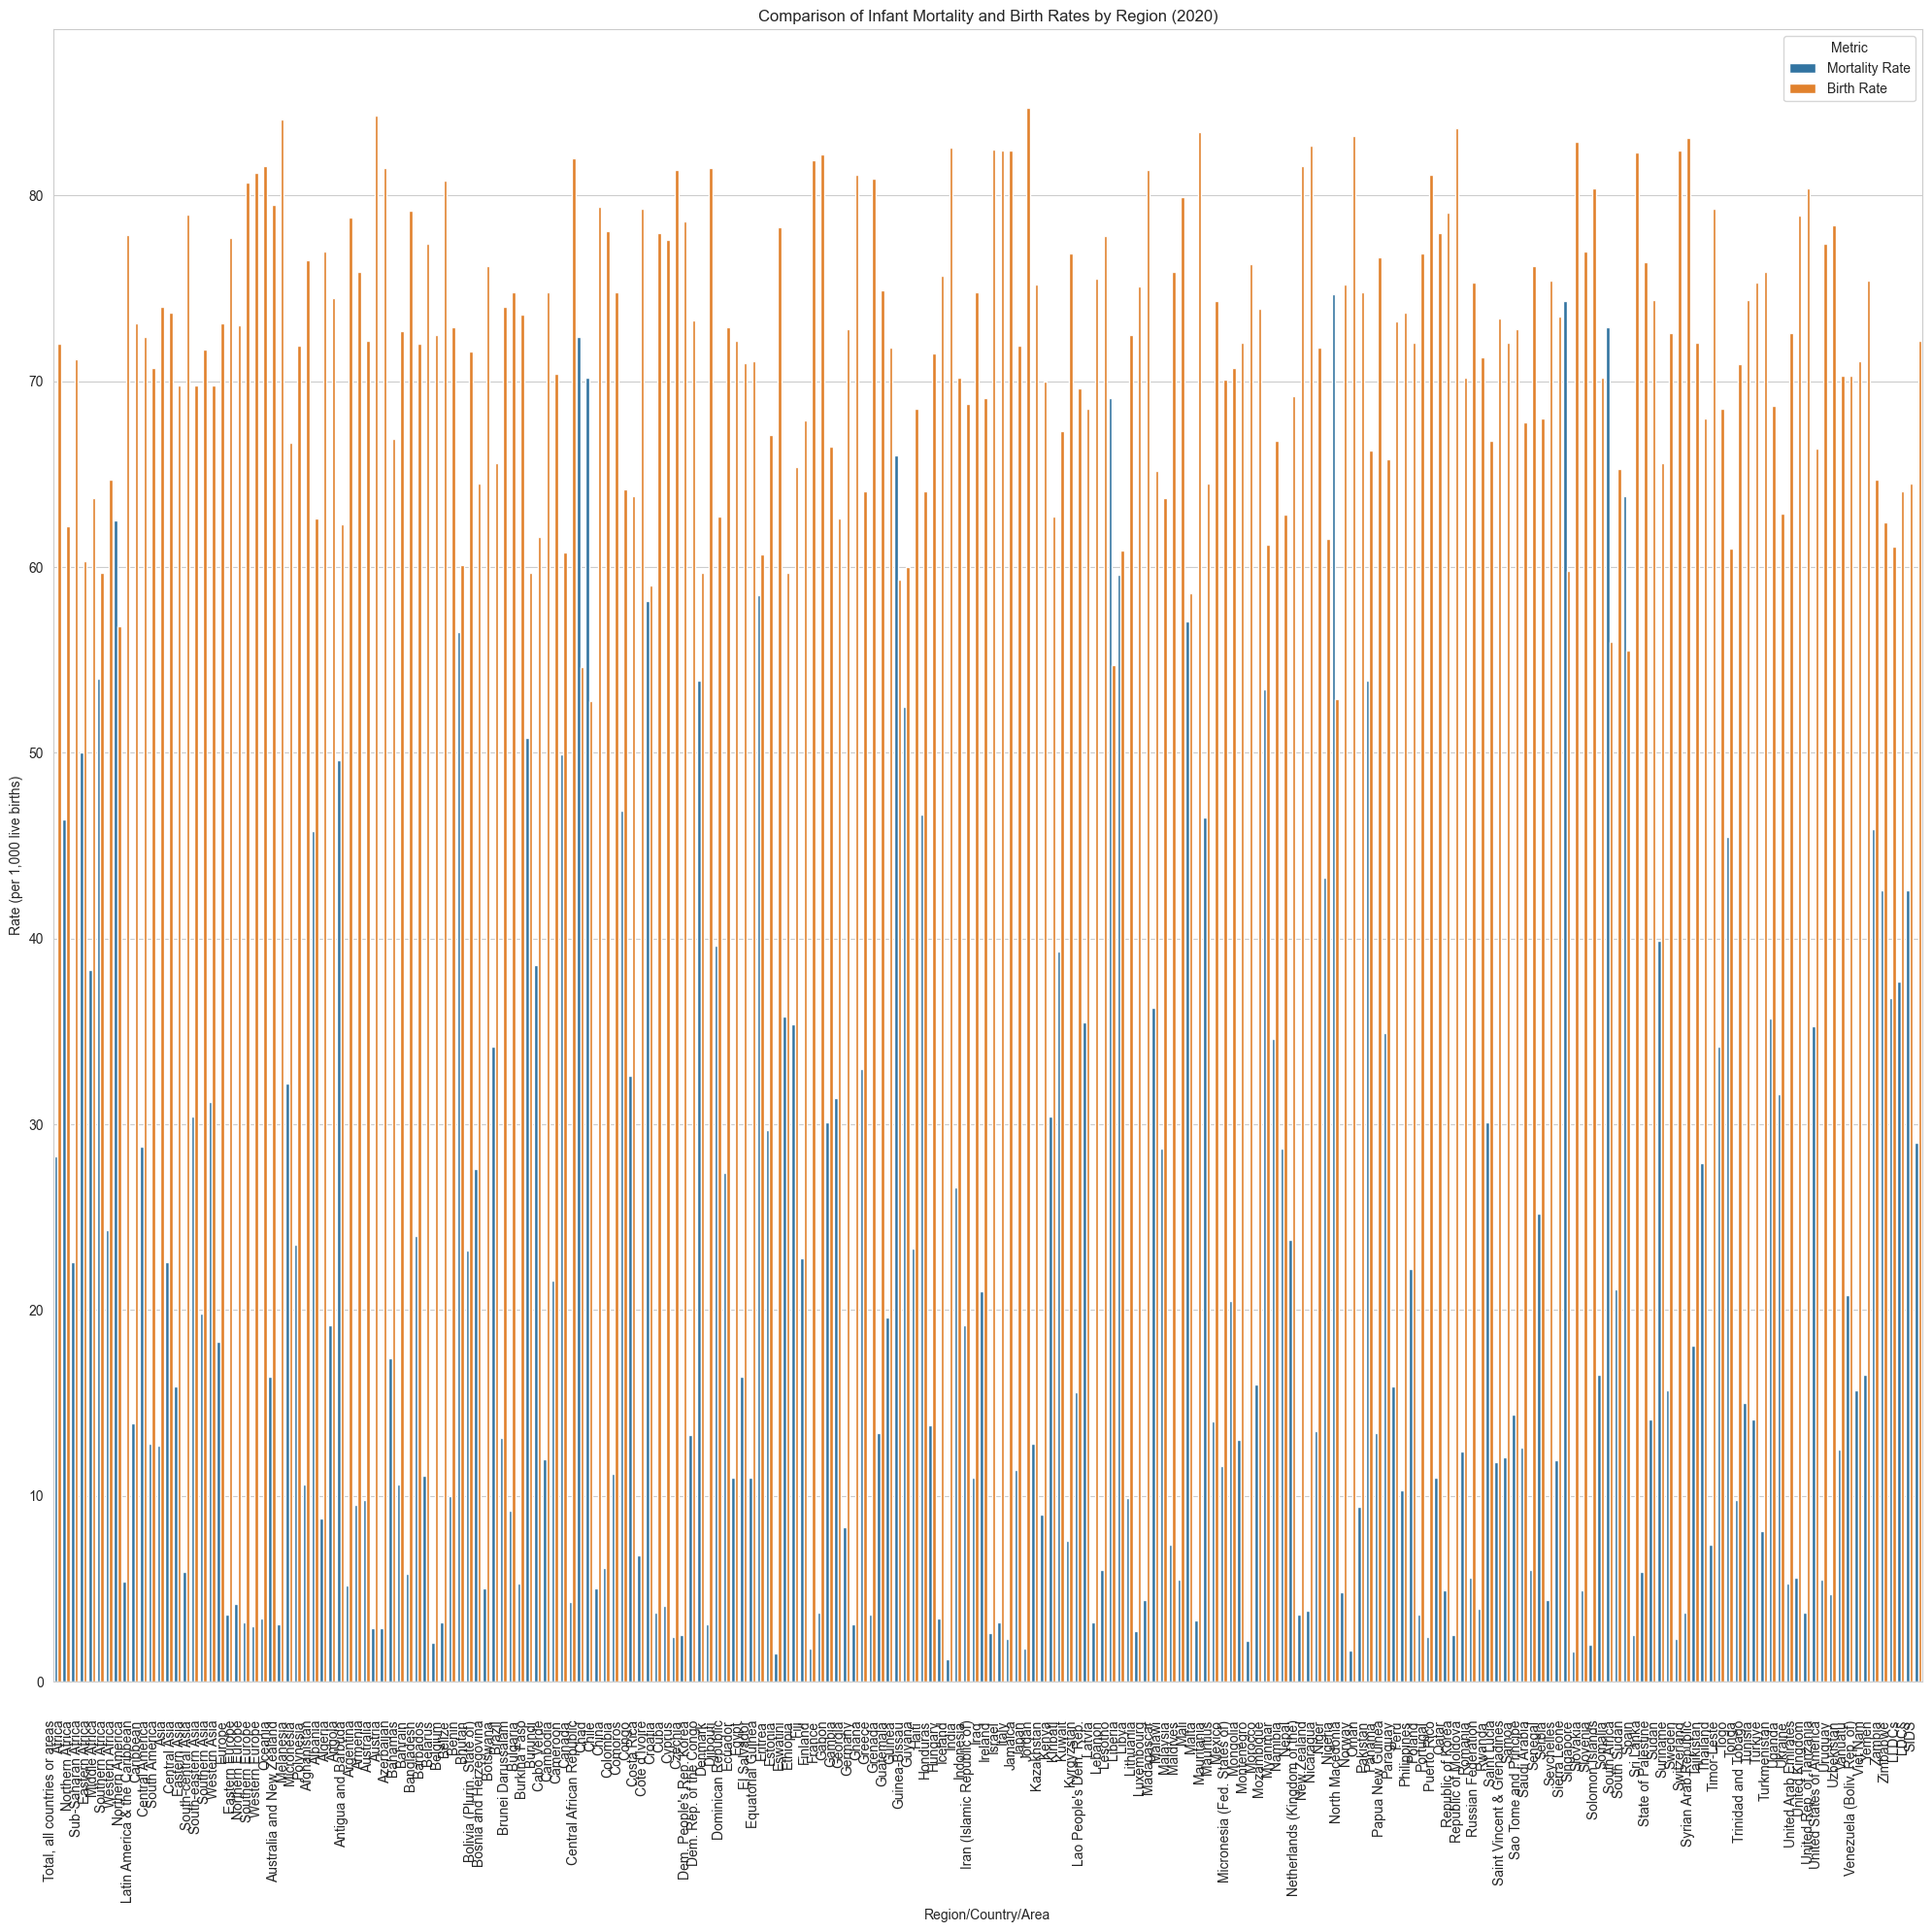

In [150]:
sns.set_style("whitegrid")

plt.figure(figsize=(20, 20))

sns.barplot(x='Region/Country/Area', y='Rate', hue='Metric', data=df_melted)

plt.xticks(rotation=90, ha='right')
plt.tick_params(axis='x', pad=25)
plt.title('Comparison of Infant Mortality and Birth Rates by Region (2020)')
plt.xlabel('Region/Country/Area')
plt.ylabel('Rate (per 1,000 live births)')

plt.tight_layout()
plt.show()